# Time Series and Forecasting	Assignment

### Course:	Time Series	and	forecasting	methods
#### Program: MSc in Data Science (part-time)


* Student: **Perakis Georgios**
* Code: **DS3616014**
* Contact: **gperakis[at]aueb.gr**

## Assignment Description

The data you will have to analyze are in the eclass in the **excel data-assignment.xls**
file. The **dependent variables** for which you will construct the models you are asked
for, are the **returns** of four investment vechicles **(Y1, Y2, Y3, Y4)** for the period **1/1991 - 12/2005**.

The **independent variables** you will use in the models refer to **monthly** values/returns for the variables:
* x1 = RUS-Rf
* x2 = RUS (-1) -Rf (-1) lagged Russel index
* x3 = MXUS-Rf
* x4 = MEM- Rf
* x5 = SMB
* x6 = HML
* x7 = MOM
* x8 = SBGC-Rf
* x9 = SBWG-Rf
* x10 = LHY-Rf
* x11 = DEFSPR
* x12 = FRSI-Rf
* x13 = GSCI-Rf
* x14 = VIX

for the period **1/1991 - 12/2005**.

Analyze dependent variables based on data for the period 1/1991 - 12/2004 **[You will not use the data for the period 1/2005 - 12/2005]**:

1. Construct an appropriate **time series** model (AR, MA, ARMA).
2. Develop an appropriate **regression** model
  * In case of **autocorrelation** problem of **regression residuals**, correct the autocorrelation problem (using time series AR, MA, ARMA models).
  * In case of **heteroscedasticity** problem of **regression residuals**, correct the
    heteroskedasticity problem (using time-varying ARCH, GARCH models).
3. Write the models you have found at questions (1) - (2). Assess the **goodness of fit** of these models based on the **AIC and BIC** information criteria.
4. Based on the estimated models of questions (1) - (2), **construct forecasts** of the analyzed series for the period **1/2005 - 12/2005**, and **evaluate the forecasts** you have found by using two evaluation criteria:
  * the mean square prediction error
  * the Hit ratio (indicates the percentage of predictions that correctly evaluate the sign of the actual value of the dependent variable.)
  
Each student will have to analyze **two only dependent variables**

## Exercise 2:

### Develop an appropriate regression model


The constructed model will be of the form:

$$y_{t+1} = a + b_{1}* x_{1, t} +  ... +  b_{k}* x_{k, t} + e_{t + 1}$$

with $$e_{t + 1} \thicksim N(0, σ^2)$$


### Load Libraries

In [1]:
# loads the library urca, which contains the command ur.df() 
# and applies Unit-Root Testing based on Dickey-Fuller test 
# install.packages(c('fGarch', 'urca','tseries','MASS'))
library(urca)
library(tseries)
library(MASS)
library(fGarch)

Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


In [2]:
# Importing data into R can be carried out in various ways. Below, the command read.table is used:
data_all = read.table('/home/george/AUEB/TimeSeries/time_series_in_r/Data-Assignment-Feb-2018.txt')

In [3]:
xdata_cols <- c('V5','V6', 'V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18')

xdata <- data_all[c(xdata_cols)]

In [4]:
head(xdata)

V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
0.04568,0.01745,0.02313,0.07273,0.0389,-0.0181,-0.0946,0.00575,0.01937,0.01868,0.0001,0.00004,-0.10389,-0.0547
0.06346,0.04568,0.09344,0.13201,0.0397,-0.0056,-0.1147,0.00144,-0.00486,0.10639,-0.0014,-0.01039,0.00866,0.0032
0.02225,0.06346,-0.06591,0.03187,0.0395,-0.0124,-0.0407,0.00253,-0.04193,0.02621,-0.0024,0.03228,0.03201,-0.0435
-0.00581,0.02225,0.00371,-0.00174,0.0037,0.0170,-0.0224,0.00790,0.01053,0.01619,-0.0008,0.01107,0.01764,0.0136
0.03258,-0.00581,0.00577,0.06795,-0.0037,-0.0052,0.0282,-0.00023,-0.00601,-0.00780,-0.0011,0.00235,-0.00524,-0.0231
-0.05360,0.03258,-0.07982,-0.04322,0.0006,0.0102,0.0010,-0.00499,-0.01526,0.01826,-0.0011,0.01085,-0.02869,0.0362


###### Let create a time series object using the function “ts” from a vector - single time-series or a matrix - multivariate time-series. The data consist of the Y1 monthly returns from 1/1991 - 12/2004, 

In [5]:
y1 <- data_all$V1

j1 = ts(y1, frequency=12, start = c(1991, 1), end = c(2004, 12))
xfactors=ts(xdata, frequency=12,  start = c(1991, 1), end = c(2004, 12))


In [6]:
train_data = data_all[1: 168,]
test_data = data_all[169:180,]

In [7]:
attach(train_data)

#### Performing Stepwise Linear Regression will all the parameters, in order to find the best model with the lower AIC

In [8]:
fitnull <- lm(V1 ~ 1)

stepSR <- step(fitnull, 
               scope=list(lower = ~ 1,
                          upper = ~ V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18),
               direction="both",
               data=train_data)

stepSR$anova

Start:  AIC=-1315.73
V1 ~ 1

       Df Sum of Sq      RSS     AIC
+ V8    1  0.041858 0.024039 -1483.1
+ V5    1  0.037818 0.028079 -1457.0
+ V7    1  0.026177 0.039720 -1398.8
+ V9    1  0.020163 0.045734 -1375.1
+ V14   1  0.017107 0.048790 -1364.2
+ V18   1  0.016947 0.048950 -1363.7
+ V10   1  0.011213 0.054684 -1345.1
+ V15   1  0.004390 0.061507 -1325.3
+ V6    1  0.002189 0.063708 -1319.4
+ V11   1  0.001875 0.064023 -1318.6
+ V17   1  0.001405 0.064492 -1317.3
+ V16   1  0.001129 0.064768 -1316.6
<none>              0.065897 -1315.7
+ V12   1  0.000101 0.065797 -1314.0
+ V13   1  0.000062 0.065835 -1313.9

Step:  AIC=-1483.14
V1 ~ V8

       Df Sum of Sq      RSS     AIC
+ V9    1  0.005287 0.018752 -1522.9
+ V5    1  0.005032 0.019007 -1520.6
+ V10   1  0.005032 0.019008 -1520.6
+ V7    1  0.001612 0.022427 -1492.8
+ V14   1  0.001245 0.022794 -1490.1
+ V6    1  0.000756 0.023283 -1486.5
+ V12   1  0.000663 0.023376 -1485.8
+ V17   1  0.000546 0.023493 -1485.0
+ V11   1  0.000

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,167,0.065897077,-1315.729
+ V8,-1,0.0418579518,166,0.024039125,-1483.142
+ V9,-1,0.0052868954,165,0.018752229,-1522.868
+ V5,-1,0.0071071361,164,0.011645093,-1600.908
+ V11,-1,0.0011216325,163,0.010523461,-1615.923
+ V6,-1,0.0007129730,162,0.009810488,-1625.709
+ V12,-1,0.0005770391,161,0.009233449,-1633.893
+ V10,-1,0.0004010867,160,0.008832362,-1639.354
+ V16,-1,0.0003276195,159,0.008504742,-1643.704
+ V17,-1,0.0002720034,158,0.008232739,-1647.165


In [9]:
summary(stepSR)


Call:
lm(formula = V1 ~ V8 + V9 + V5 + V11 + V6 + V12 + V10 + V16 + 
    V17 + V18 + V13)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0164400 -0.0051826 -0.0002619  0.0047843  0.0201949 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0058549  0.0006006   9.748  < 2e-16 ***
V8           0.1174414  0.0130136   9.025 6.34e-16 ***
V9           0.1803062  0.0210408   8.569 9.52e-15 ***
V5           0.2366224  0.0241604   9.794  < 2e-16 ***
V11          0.0266261  0.0119803   2.222 0.027688 *  
V6           0.0565637  0.0150432   3.760 0.000240 ***
V12          0.2160292  0.0560064   3.857 0.000167 ***
V10         -0.0497117  0.0199217  -2.495 0.013624 *  
V16          0.0864282  0.0590474   1.464 0.145286    
V17          0.0260040  0.0108738   2.391 0.017973 *  
V18          0.0512296  0.0227067   2.256 0.025451 *  
V13         -0.0689775  0.0436073  -1.582 0.115723    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.

In [10]:
detach(train_data)

### We'll now run a diagnostic check for the residuals of the fitted regression model

In [11]:
stepSRresidualsTS <- ts(stepSR$residuals,
                        frequency=12,
                        start = c(1991,1),
                        end = c(2004, 12))
stepSRresidualsTS

               Jan           Feb           Mar           Apr           May
1991 -5.412956e-03 -8.448225e-03  1.464042e-02  7.975691e-04 -5.736115e-03
1992  7.163441e-03  7.725163e-03  3.545627e-03  5.887146e-03  9.435022e-03
1993  7.299773e-03  6.514941e-03  1.419287e-02  1.526544e-02  8.072780e-03
1994  8.573122e-04 -7.958607e-03  6.748320e-03 -3.181813e-03 -3.154596e-03
1995  2.441401e-03 -3.914028e-03  2.033055e-03  3.286789e-03 -8.167824e-03
1996  8.811583e-03 -1.355812e-03  1.942736e-03  1.325741e-02  1.143975e-02
1997  4.832775e-03  1.618083e-03 -6.450213e-03 -1.235877e-02  5.061081e-03
1998 -9.143614e-03  2.311900e-03  6.679642e-04  1.406088e-03  1.349341e-03
1999  9.697599e-04 -2.896378e-03  6.435461e-03  1.380292e-02  3.605155e-03
2000 -4.959923e-03  7.955959e-03  8.292090e-03 -2.619757e-03 -1.797485e-03
2001  6.580682e-03 -1.130706e-03  7.013274e-03 -8.812554e-03 -9.215826e-03
2002 -9.143783e-03 -1.015864e-02 -5.894155e-03 -6.238339e-03  1.033527e-02
2003  7.612116e-03 -1.500

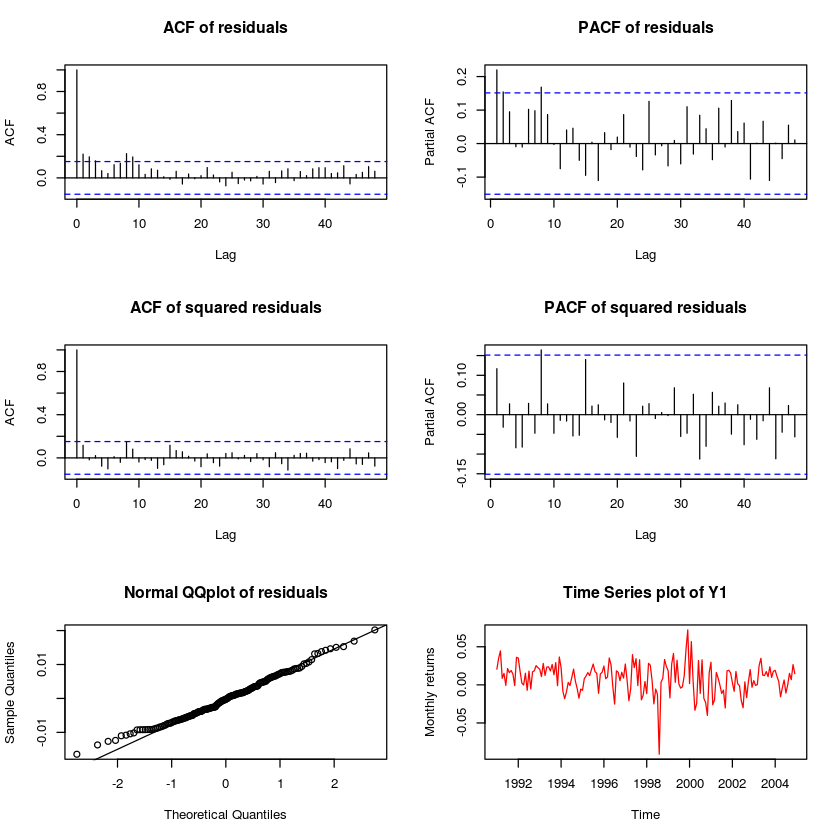

In [12]:
par(mfrow=c(3,2))

# set up the graphics
acf(ts(stepSRresidualsTS,freq=1), 48, main="ACF of residuals")
pacf(ts(stepSRresidualsTS,freq=1), 48, main="PACF of residuals")
acf(ts(stepSRresidualsTS^2,freq=1), 48, main="ACF of squared residuals")
pacf(ts(stepSRresidualsTS^2,freq=1), 48, main="PACF of squared residuals")
qqnorm(stepSRresidualsTS,main="Normal QQplot of residuals")
qqline(stepSRresidualsTS)
plot(j1, type="l", col='red', lwd=1, main="Time Series plot of Y1", ylab="Monthly returns")


### Based on the residual plots presented above:

* From the ACF and PACF of the residuals, it seems that the assumptions with respect to them are **not** satisfied:
  * **Restricted MA(9) (1,2,8,9 lags)** and **restricted AR(8) (1,8 lags)** must be implemented in the residuals of the stepwise regression model.

* From the PACF fo the squared residuals it seems that there is an **heteroskedastisity** issue.
  * We'll try to fix this by implementing a ARCH(8) model in the residuals

* From the Normal  QQPlot of residuals several points are off the line. So we assume non normality.

From the lower right plot of the return series we observe that the volatility of the return series is not constant over time. There is evidence of volatility clustering phenomenon, since there are periods of high and low volatility. 

## Models

### Restricted AR(8) for lags: 1, 8

In [13]:
ar8restricted <- arima(stepSRresidualsTS, 
                       order=c(8,0,0), 
                       fixed= c(NA, 0,0,0,0,0,0,NA, NA))
ar8restricted

Warning message in arima(stepSRresidualsTS, order = c(8, 0, 0), fixed = c(NA, 0, :
“some AR parameters were fixed: setting transform.pars = FALSE”


Call:
arima(x = stepSRresidualsTS, order = c(8, 0, 0), fixed = c(NA, 0, 0, 0, 0, 0, 
    0, NA, NA))

Coefficients:
         ar1  ar2  ar3  ar4  ar5  ar6  ar7     ar8  intercept
      0.1921    0    0    0    0    0    0  0.2093     -1e-04
s.e.  0.0741    0    0    0    0    0    0  0.0758      8e-04

sigma^2 estimated as 4.266e-05:  log likelihood = 606.64,  aic = -1205.27

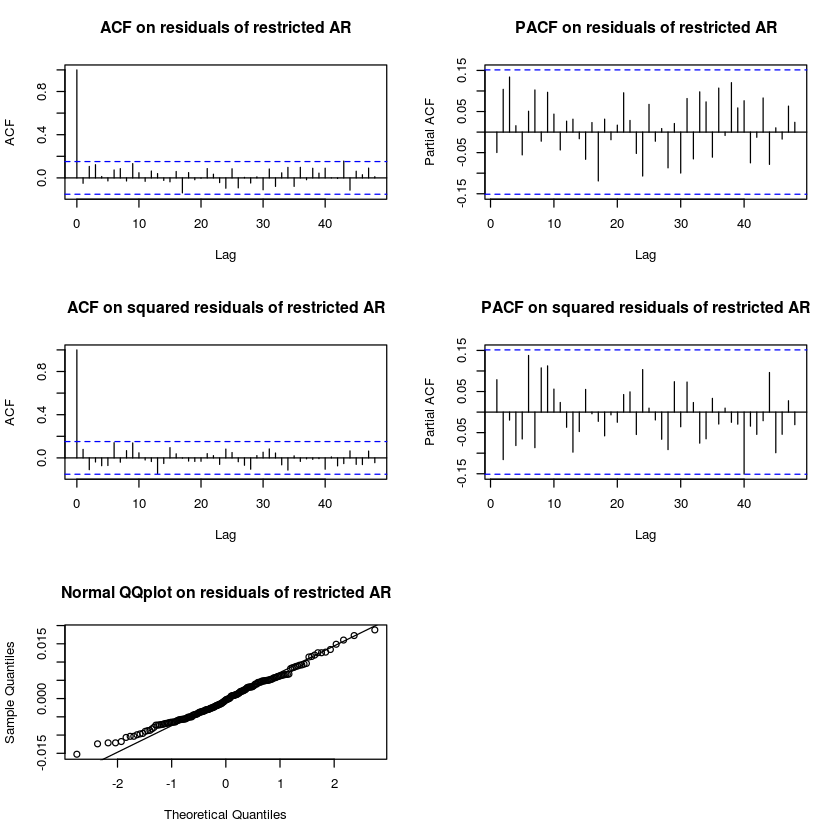

In [14]:
par(mfrow=c(3,2))
ar8restricted_residualsTS <- ts(ar8restricted$residuals, frequency=12, start = c(1991, 1), end = c(2004, 12))

# set up the graphics
acf(ts(ar8restricted_residualsTS,freq=1), 48, main="ACF on residuals of restricted AR")
pacf(ts(ar8restricted_residualsTS,freq=1), 48, main="PACF on residuals of restricted AR")
acf(ts(ar8restricted_residualsTS^2,freq=1), 48, main="ACF on squared residuals of restricted AR")
pacf(ts(ar8restricted_residualsTS^2,freq=1), 48, main="PACF on squared residuals of restricted AR")
qqnorm(ar8restricted_residualsTS,main="Normal QQplot on residuals of restricted AR")
qqline(ar8restricted_residualsTS)

In [15]:
Box.test(ar8restricted_residualsTS, lag=12, type="Ljung")
Box.test(ar8restricted_residualsTS^2, lag=12, type="Ljung")


	Box-Ljung test

data:  ar8restricted_residualsTS
X-squared = 11.981, df = 12, p-value = 0.4472



	Box-Ljung test

data:  ar8restricted_residualsTS^2
X-squared = 13.788, df = 12, p-value = 0.3145


### Restricted MA(9) (1, 2, 8, 9 lags)

In [16]:
ma9restricted <- arima(stepSRresidualsTS, 
                       order=c(0,0,9), 
                       fixed= c(NA, NA, 0, 0, 0, 0, 0, NA, NA, NA))
ma9restricted


Call:
arima(x = stepSRresidualsTS, order = c(0, 0, 9), fixed = c(NA, NA, 0, 0, 0, 
    0, 0, NA, NA, NA))

Coefficients:
         ma1     ma2  ma3  ma4  ma5  ma6  ma7     ma8     ma9  intercept
      0.0985  0.1208    0    0    0    0    0  0.1994  0.2048     -1e-04
s.e.  0.0773  0.0777    0    0    0    0    0  0.0735  0.0759      8e-04

sigma^2 estimated as 4.144e-05:  log likelihood = 608.92,  aic = -1205.84

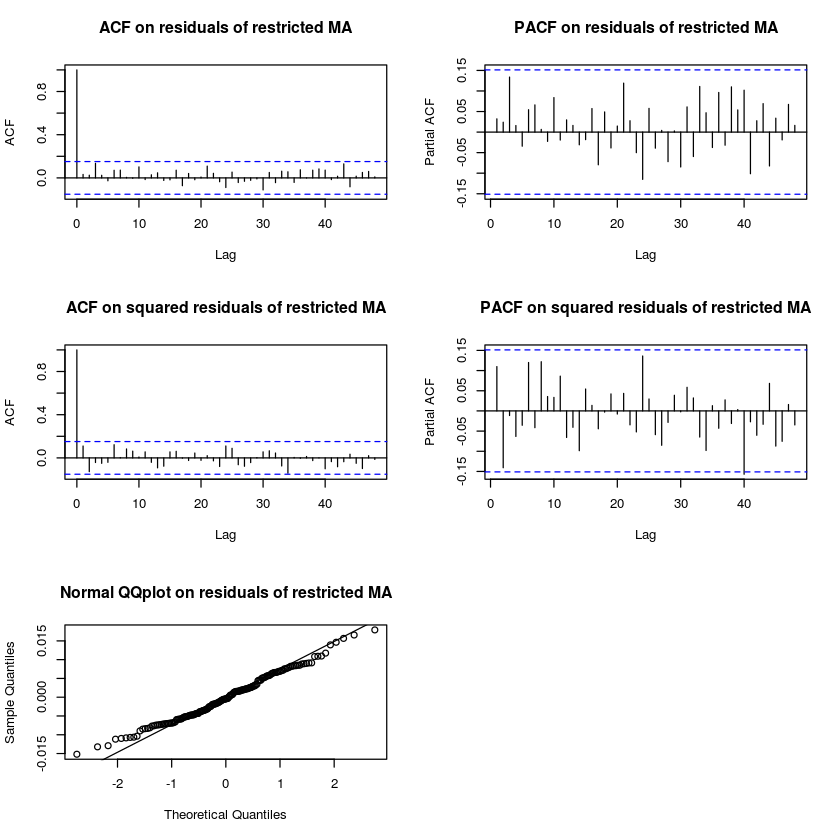

In [17]:
par(mfrow=c(3,2))
ma9restricted_residualsTS <- ts(ma9restricted$residuals, frequency=12, start = c(1991, 1), end = c(2004, 12))

# set up the graphics
acf(ts(ma9restricted_residualsTS,freq=1), 48, main="ACF on residuals of restricted MA")
pacf(ts(ma9restricted_residualsTS,freq=1), 48, main="PACF on residuals of restricted MA")
acf(ts(ma9restricted_residualsTS^2,freq=1), 48, main="ACF on squared residuals of restricted MA")
pacf(ts(ma9restricted_residualsTS^2,freq=1), 48, main="PACF on squared residuals of restricted MA")
qqnorm(ma9restricted_residualsTS,main="Normal QQplot on residuals of restricted MA")
qqline(ma9restricted_residualsTS)

In [18]:
Box.test(ma9restricted_residualsTS, lag=12, type="Ljung")
Box.test(ma9restricted_residualsTS^2, lag=12, type="Ljung")


	Box-Ljung test

data:  ma9restricted_residualsTS
X-squared = 7.5372, df = 12, p-value = 0.8202



	Box-Ljung test

data:  ma9restricted_residualsTS^2
X-squared = 11.308, df = 12, p-value = 0.5027


#### Restricted ARMA(8, 9)

In [19]:
arma89restricted <- arima(stepSRresidualsTS, 
                          
                       order=c(8,0,9), 
                       fixed= c(NA, 0, 0, 0, 0, 0, 0, NA, NA, NA, 0, 0,0,0, 0, NA, NA, NA))
arma89restricted

Warning message in arima(stepSRresidualsTS, order = c(8, 0, 9), fixed = c(NA, 0, :
“some AR parameters were fixed: setting transform.pars = FALSE”


Call:
arima(x = stepSRresidualsTS, order = c(8, 0, 9), fixed = c(NA, 0, 0, 0, 0, 0, 
    0, NA, NA, NA, 0, 0, 0, 0, 0, NA, NA, NA))

Coefficients:
         ar1  ar2  ar3  ar4  ar5  ar6  ar7      ar8      ma1     ma2  ma3  ma4
      0.4686    0    0    0    0    0    0  -0.0349  -0.3497  0.1246    0    0
s.e.  0.2094    0    0    0    0    0    0   0.2070   0.2100  0.0800    0    0
      ma5  ma6  ma7     ma8     ma9  intercept
        0    0    0  0.2246  0.1166     -1e-04
s.e.    0    0    0  0.1894  0.1013      1e-03

sigma^2 estimated as 4.065e-05:  log likelihood = 610.52,  aic = -1205.05

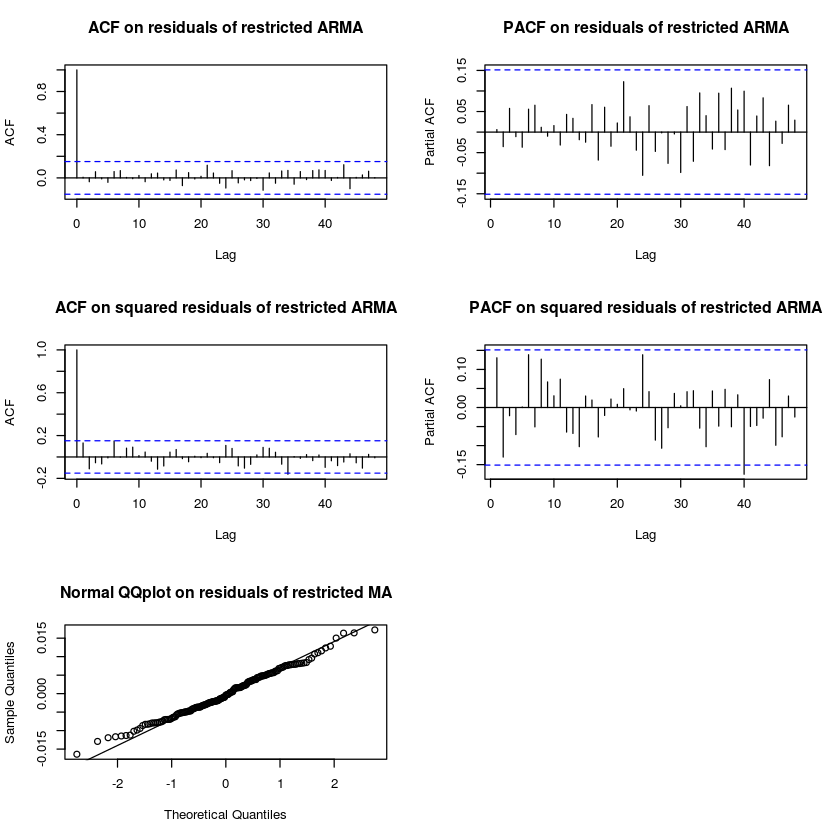

In [20]:
par(mfrow=c(3,2))
arma89restricted_residualsTS <- ts(arma89restricted$residuals, frequency=12, start = c(1991, 1), end = c(2004, 12))

# set up the graphics
acf(ts(arma89restricted_residualsTS,freq=1), 48, main="ACF on residuals of restricted ARMA")
pacf(ts(arma89restricted_residualsTS,freq=1), 48, main="PACF on residuals of restricted ARMA")
acf(ts(arma89restricted_residualsTS^2,freq=1), 48, main="ACF on squared residuals of restricted ARMA")
pacf(ts(arma89restricted_residualsTS^2,freq=1), 48, main="PACF on squared residuals of restricted ARMA")
qqnorm(arma89restricted_residualsTS,main="Normal QQplot on residuals of restricted MA")
qqline(arma89restricted_residualsTS)

In [21]:
Box.test(arma89restricted_residualsTS, lag=12, type="Ljung")
Box.test(arma89restricted_residualsTS^2, lag=12, type="Ljung")


	Box-Ljung test

data:  arma89restricted_residualsTS
X-squared = 3.0913, df = 12, p-value = 0.9949



	Box-Ljung test

data:  arma89restricted_residualsTS^2
X-squared = 13.614, df = 12, p-value = 0.3261


### Based on the residual plots and the Box Tests of the 3 different models presented above:

* From the ACF and PACF of the residuals:

  * **Restricted AR**: It seems that the assumptions with respect to them are satisfied
  * **Restricted MA**: It seems that the assumptions with respect to them are satisfied
  * **Restricted ARMA**: It seems that the assumptions with respect to them are satisfied


* From the PACF fo the **squared** residuals:
  * **Restricted AR**: It seems that the assumptions regarding homoskedasticity are satisfied
  * **Restricted MA**: It seems that the assumptions regarding homoskedasticity are satisfied
  * **Restricted ARMA**: It seems that the assumptions regarding homoskedasticity are satisfied


* From the Normal QQPlot of residuals **for all 3 models** normality is **rejected**!!

Summarizing we have the following:

* Restricted AR(8): 
  * Variance: **4.266e-05**
  * AIC: **-1205.27**
* Restricted MA(9):
  * Variance: **4.144e-05**
  * AIC: **-1205.84**
* Restricted ARMA(8, 9)
  * Variance: **4.065e-05**
  * AIC: **-1205.05**

  
### Conclusion:

* The model with the lowest variance and lower AIC score is the best. 
* Here, **restricted ARMA(8, 9)** has both the smallest variance and smallest AIC. Thus, it's the model that best fits the data.

## Heteroskedasticity

In [22]:
# First, we will fit an ARCH(1) model:
m1arch <- garchFit(~garch(1,0), data=stepSR$residuals, trace=F)
# trace = F reduces the summary
summary(m1arch)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 0), data = stepSR$residuals, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 0)
<environment: 0x6047988>
 [data = stepSR$residuals]

Conditional Distribution:
 norm 

Coefficient(s):
         mu        omega       alpha1  
-8.3325e-19   3.9679e-05   1.5778e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu     -8.333e-19   5.454e-04    0.000    1.000    
omega   3.968e-05   6.400e-06    6.200 5.63e-10 ***
alpha1  1.578e-01   1.240e-01    1.272    0.203    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 599.9101    normalized:  3.570894 

Description:
 Mon Mar  5 12:52:00 2018 by user:  


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  4.584752  0.1010261   
 Shapiro-Wilk Test  R    W      0.9840617 0.05148097  
 Ljung-Box Test     R    Q(10)  39.710

We obtain the parameter estimates,
the corresponding standard errors, the t-statistics and the associated p-values, in order to examine the
statistical significance of the model parameters. 

The ARCH(1) model is written:

$$y_{t} = μ + e_{t} , $$
$$e_{t} = σ_{t}*v_{t} \thicksim N(0,1), $$
$$σ^2_{t} = a_{0} + a_{1}*e^2_{t-1} $$

Thus, the estimated ARCH(1) model is:
$$y_{t} = -1.1216e-18 + e_{t} , $$
$$e_{t} = σ_{t}*v_{t} \thicksim N(0,1), $$
$$σ^2_{t} = 0.000039679 + 0.15778*e^2_{t-1} $$


There are different diagnostic tests outlined in the aformentioned summary, performed on the residuals $R$ and/or the squared residuals $R^2$. 

The **Jarque-Bera** and the **Shapiro-Wilk** tests are used in order to examine the normality assumption of the model residuals. It seems that the null hypothesis of normality (p values 0.1010261 and 0.05148097) cannot be rejected, i.e. there is evidence of **normality** of residuals. 

Most of the remaining tests are based on the Ljung-Box Q-statistic to examine the autocorrelation of the residuals and/or the squared residuals. The results indicate that there **exists autocorrelation** in the **residuals** series. On the contrary the tests indicate **no autocorrelation in the squared residuals**.

That is, the ARCH(1) model did not capture adequately the time-varying characteristics of the return series.

In [23]:
predict(m1arch, 6)

meanForecast,meanError,standardDeviation
-8.3325e-19,0.006381814,0.006381814
-8.3325e-19,0.006790083,0.006790083
-8.3325e-19,0.006852279,0.006852279
-8.3325e-19,0.006862041,0.006862041
-8.3325e-19,0.006863580,0.006863580
-8.3325e-19,0.006863823,0.006863823


#### Student t ARCH model

In [24]:
m1arch_student=garchFit(~garch(1,0),data=stepSR$residuals, cond.dist="std",trace=F)
summary(m1arch_student)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 0), data = stepSR$residuals, cond.dist = "std", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 0)
<environment: 0x3a8a8b0>
 [data = stepSR$residuals]

Conditional Distribution:
 std 

Coefficient(s):
         mu        omega       alpha1        shape  
-8.3325e-19   4.0900e-05   2.1345e-01   1.0000e+01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu     -8.333e-19   5.450e-04    0.000   1.0000    
omega   4.090e-05   7.825e-06    5.227 1.73e-07 ***
alpha1  2.134e-01   1.600e-01    1.334   0.1821    
shape   1.000e+01   4.108e+00    2.434   0.0149 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 598.2538    normalized:  3.561035 

Description:
 Mon Mar  5 12:52:01 2018 by user:  


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  4.888336  0.086

The ARCH(1) model based on Student-t errors is:

$$y_{t} = μ + e_{t} , $$
$$e_{t} = σ_{t}*v_{t},  v_{t}\thicksim Student-t_{1.0000e+01}, $$
$$σ^2_{t} = a_{0} + a_{1}*e^2_{t-1} $$

Thus, the estimated ARCH(1) model is:
$$y_{t} = -8.3325e-19 + e_{t} , $$
$$e_{t} = σ_{t}*v_{t},  v_{t}\thicksim Student-t_{1.0000e+01}, $$
$$σ^2_{t} = 0.0000409 + 0.21345*e^2_{t-1} $$


There are different diagnostic tests outlined in the aformentioned summary, performed on the residuals $R$ and/or the squared residuals $R^2$. 

The **Jarque-Bera** and the **Shapiro-Wilk** tests are used in order to examine the normality assumption of the model residuals. It seems that the null hypothesis of normality (p values 0.08679832 and 0.03793478) cannot surely be rejected, i.e. there is *some* evidence of **normality** of residuals. 

Most of the remaining tests are based on the Ljung-Box Q-statistic to examine the autocorrelation of the residuals and/or the squared residuals. The results indicate that there **exists autocorrelation** in the **residuals** series. On the contrary the tests indicate some autocorrelation in the squared residuals.

That is, the ARCH(1) model did not capture adequately the time-varying characteristics of the return series.

### GARCH Models

We can estimate a GARCH(1,1) model based on normal distribution for the error process. The following
set of commands estimates the model, presents a summary of the obtained results, gives several graphs
to evaluate the model fit, and computes predictions:

In [25]:
m2garch=garchFit(~garch(1,1),data=stepSR$residuals,trace=F)
summary(m2garch)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = stepSR$residuals, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x1fdb868>
 [data = stepSR$residuals]

Conditional Distribution:
 norm 

Coefficient(s):
         mu        omega       alpha1        beta1  
-8.3325e-19   3.9679e-05   1.5778e-01   1.0000e-08  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)
mu     -8.333e-19   5.584e-04    0.000    1.000
omega   3.968e-05   3.177e-05    1.249    0.212
alpha1  1.578e-01   1.704e-01    0.926    0.355
beta1   1.000e-08   7.692e-01    0.000    1.000

Log Likelihood:
 599.9101    normalized:  3.570894 

Description:
 Mon Mar  5 12:52:01 2018 by user:  


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  4.584748  0.1010263   
 Shapiro-Wilk Test  R    W      0.9840617 0.05148117  
 Ljung-Box Test     R    Q(10)  39.71049  1.905


The GARCH(1, 1) model is written:

$$y_{t} = μ + e_{t} , $$
$$e_{t} = σ_{t}*v_{t},  v_{t}\thicksim N(0,1), $$
$$σ^2_{t} = a_{0} + a_{1}*e^2_{t-1} +  b_{1}*σ^2_{t-1} $$

Thus, the estimated GARCH(1, 1) model is:
$$y_{t} = -8.3325* 10^{-19} + e_{t} , $$
$$e_{t} = σ_{t}*v_{t} \thicksim N(0,1), $$
$$σ^2_{t} = 3.9679 * 10^{-5} + 1.5778*10^{-1}e^2_{t-1} +  10^{-8}*σ^2_{t-1} $$


There are different diagnostic tests outlined in the aformentioned summary, performed on the residuals $R$ and/or the squared residuals $R^2$. 

The **Jarque-Bera** and the **Shapiro-Wilk** tests are used in order to examine the normality assumption of the model residuals. It seems that the null hypothesis of normality (p values 0.1010263 and 0.05148117) cannot be rejected, i.e. there is evidence of **normality** of residuals. 

Most of the remaining tests are based on the Ljung-Box Q-statistic to examine the autocorrelation of the residuals and/or the squared residuals. 

The results indicate that there **exists autocorrelation** in the **residuals** series. On the contrary the tests indicate **no autocorrelation in the squared residuals**.

That is, the GARCH(1, 1) model did not capture adequately the time-varying characteristics of the return series.

### Combined ARMA + GARCH Model

In [26]:
arma11_garch11fit <- garchFit(formula= ~arma(1,1) + garch(1,1),
                              data=stepSR$residuals,
                              trace=F)
summary(arma11_garch11fit)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~arma(1, 1) + garch(1, 1), data = stepSR$residuals, 
    trace = F) 

Mean and Variance Equation:
 data ~ arma(1, 1) + garch(1, 1)
<environment: 0x58de7a0>
 [data = stepSR$residuals]

Conditional Distribution:
 norm 

Coefficient(s):
         mu          ar1          ma1        omega       alpha1        beta1  
-8.3325e-19   8.2028e-01  -6.4688e-01   3.2707e-06   6.6956e-03   9.1483e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu     -8.333e-19   1.819e-04    0.000  1.00000    
ar1     8.203e-01   1.533e-01    5.350 8.78e-08 ***
ma1    -6.469e-01   1.989e-01   -3.253  0.00114 ** 
omega   3.271e-06   5.953e-06    0.549  0.58269    
alpha1  6.696e-03   3.203e-02    0.209  0.83443    
beta1   9.148e-01   1.464e-01    6.247 4.18e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 605.9441    normalized:  3.60681 

Description:
 Mon Mar

There are different diagnostic tests outlined in the aformentioned summary, performed on the residuals $R$ and/or the squared residuals $R^2$. 

The **Jarque-Bera** and the **Shapiro-Wilk** tests are used in order to examine the normality assumption of the model residuals. It seems that the null hypothesis of normality (p values 0.09175789 and 0.03454298) is rejected, i.e. there is evidence of **non normality** of residuals. 

Most of the remaining tests are based on the Ljung-Box Q-statistic to examine the autocorrelation of the residuals and/or the squared residuals. 

The results indicate that there is **no autocorrelation** in the **residuals** series. Also, the tests indicate **no autocorrelation in the squared residuals**.

That is, **ARMA(1,1) + GARCH(1,1)** model **did capture** adequately the time-varying characteristics of the return series.

### Forecast and Evaluation

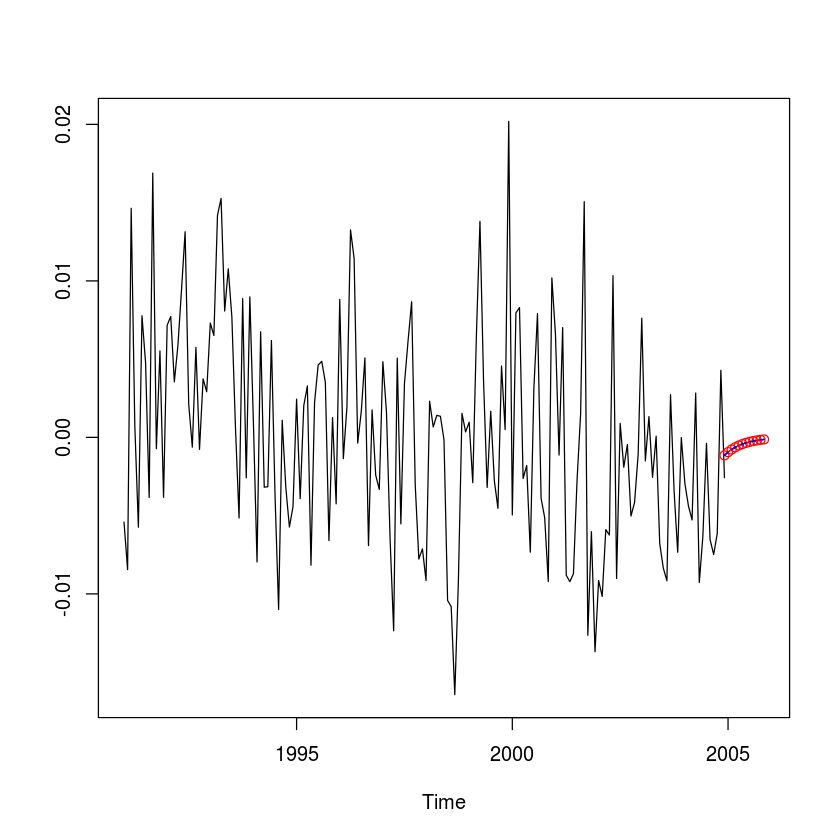

In [27]:
forecast <- predict(arma11_garch11fit, 12)

# plot of forecasts with 1 standard error
par(mfrow=c(1,1))
UL <- forecast$meanForecast + forecast$meanError
LL <- forecast$meanForecast - forecast$meanError

predTS <- ts(forecast$meanForecast, frequency=12, start = c(2004, 12))
UL_TS <- ts(forecast$meanForecast, frequency=12, start = c(2004, 12))
LL_TS <- ts(forecast$meanForecast, frequency=12, start = c(2004, 12))

min_x <- min(stepSRresidualsTS, LL)
max_x <- max(stepSRresidualsTS, UL)

ts.plot(stepSRresidualsTS, predTS)
lines(predTS, col="red", type="o")
lines(UL_TS, col="blue", lty="dashed")
lines(LL_TS, col="blue", lty="dashed")

### Mean Squared Error

In [29]:
library(hydroGOF)
MSE <- mse(forecast$meanForecast, forecast$meanError)
MSE

[1] 5.028557e-05

$$MSE = 5.028* 10^{-5}$$